In [1]:
import networkx as nx
import sys
sys.path.append(r"C:\Users\egbonsisi\ControllerPlacementCodes\Skoltech-PhD-Thesis\_codes\SIR\Influential-nodes-identification-in-complex-networks-via-information-entropy")
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
data_file = 'topo'  # 'HepPh'
G = clean_data(data_file)
print(nx.number_of_nodes(G), nx.number_of_edges(G))


34 42


In [3]:
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)

# set edge attributes
set_edge_attr(G, edge_geo_data_combined)

### Degree, Two Step Neghbor $D - 2SN$

In [5]:
d = [(i, len(n_neighbor(G, i, 1)))
          for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
two_sn = [(i, len(n_neighbor(G, i, 2)))
          for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
combined_dict_d, combined_dict_k_2 = varying_examples(d, two_sn)

# Get ranked result
opti_rank_m1, ranked_nodes_m1 = rank_result(combined_dict_d, combined_dict_k_2)
# opti_rank_m1
# ranked_nodes_m1


### Degree, Two Step Neighbour $D - 2SN$

In [6]:
d = [(i, len(n_neighbor(G, i, 1)))
          for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
two_sn = [(i, len(n_neighbor(G, i, 2)))
          for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
combined_dict_d, combined_dict_k_2 = varying_examples(d, two_sn)

# Get ranked result
opti_rank_m1, ranked_nodes_m1 = rank_result(combined_dict_d, combined_dict_k_2)
# opti_rank_m1
# ranked_nodes_m1

In [7]:
ns_over_d = [(i, sum(hub_information(G, i, 1))/len(n_neighbor(G, i, 1)))
 for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]

combined_dict, combined_dict_k_2 = varying_examples(ns_over_d, two_sn)

# Get ranked result
opti_rank_m2, ranked_nodes_m2 = rank_result(combined_dict, combined_dict_k_2)
# opti_rank_m2
# ranked_nodes_m2


### $D - WD$

In [8]:
w_d = [(i[0],i[1]-(j[1])) for i,j in zip(ns_over_d, two_sn)]
combined_dict_w_d, combined_dict_k_w_d = varying_examples(d, w_d)

# Get ranked result
opti_rank_m3, ranked_nodes_m3 = rank_result(combined_dict_w_d, combined_dict_k_w_d)
# opti_rank_m3
# ranked_nodes_m3


### $K - 2SN$

In [9]:
# obtain the node degrees and edges weights to desired lengths
tmp_t = list(range(1, 5))
tmp_t_SN, tmp_t_hub = hubs_SN_NS(G, tmp_t)
# tmp_t_SN = [1/x for x in tmp_t_SN[0][1]]
combined_dict_m0, combined_dict_k_2 = varying_examples(
    tmp_t_SN[0][1], tmp_t_hub[1][2])
# print(tmp_t_hub)
tmp_t_hub_inverse = [{key:[(k,1/v) for k,v in values] for key, values in x.items()} for x in tmp_t_hub]
combined_dict_m0, combined_dict_k_2_inverse = varying_examples(
    tmp_t_SN[0][1], tmp_t_hub_inverse[1][2])
# print(tmp_t_hub_inverse)
# combined_dict_m0 = [{k:}]
# Get ranked result
opti_rank_m0, ranked_nodes_m0 = rank_result(combined_dict_m0, combined_dict_k_2)
opti_rank_m0_inverse, ranked_nodes_m0_inverse = rank_result(combined_dict_m0, combined_dict_k_2_inverse)


# print(opti_rank_m0, ranked_nodes_m0)
print(opti_rank_m0_inverse,"...........", ranked_nodes_m0_inverse)
print(len(opti_rank_m0_inverse))


[('2', 0.8924560648197681), ('12', 0.8890269000591076), ('5', 0.8890145953016483), ('19', 0.3164803288323028), ('6', 0.28003997118089297), ('21', 0.27557553121901623), ('7', 0.2674113211113268), ('24', 0.2632494183212946), ('14', 0.26256299170506336), ('16', 0.2586139378323971), ('11', 0.2550594741496443), ('29', 0.25477132160955585), ('8', 0.2533700070344329), ('28', 0.23626740250246403), ('27', 0.23154649604940625)] ........... [('2', 0.8924560648197681), ('12', 0.8890269000591076), ('5', 0.8890145953016483), ('19', 0.3164803288323028), ('6', 0.28003997118089297), ('21', 0.27557553121901623), ('7', 0.2674113211113268), ('24', 0.2632494183212946), ('14', 0.26256299170506336), ('16', 0.2586139378323971), ('11', 0.2550594741496443), ('29', 0.25477132160955585), ('8', 0.2533700070344329), ('28', 0.23626740250246403), ('27', 0.23154649604940625), ('18', -0.23154649604940625), ('20', -0.2732148544518695), ('4', -0.3097352283586677), ('9', -0.31633744151144133), ('10', -0.3222355994813834),

### Classical Model

In [10]:
max_ = 1
max_topk = round(max_ * nx.number_of_nodes(G))
newmethod_rank = EnRenewRank(G, max_topk, 2)


In [11]:
infect_prob = compute_probability(G) * 1.5
print(infect_prob)
atio = 1.5
cover_prob = infect_prob / atio
avg = 100
max_iter = 200000


0.8873239436619718


In [12]:
rates = [0.20, 0.40, 0.65, 0.80]
topk_list = list(map(lambda x: round(nx.number_of_nodes(G) * x), rates))
topk_list


[7, 14, 22, 27]

### Weighted Degree $WD  - 2SN$
$Where  WD = 1/(NS/D)$

In [13]:
m0_result = [get_sir_result(G, ranked_nodes_m0, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
m1_result = [get_sir_result(G, ranked_nodes_m1, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
m2_result = [get_sir_result(G, ranked_nodes_m2, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
m3_result = [get_sir_result(G, ranked_nodes_m3, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]
newmethod_result = [get_sir_result(G,newmethod_rank, k, avg, infect_prob, cover_prob, max_iter)[-1]/ nx.number_of_nodes(G) for k in topk_list]



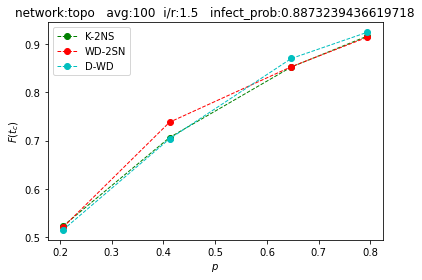

In [14]:
%matplotlib inline
plt.title(f'network:{data_file}   avg:{avg}  i/r:{atio}   infect_prob:{infect_prob}')
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m0_result, 'g--o', label='K-2NS', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m1_result, 'b-o', label='D-2SN', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m2_result, 'r--o', label='WD-2SN', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), m3_result, 'c--o', label='D-WD', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), newmethod_result, 'y--o', label='Classical', linewidth=1.0, )
plt.legend(loc="upper left")
plt.ylabel("$F(t_c)$")
plt.xlabel('$p$')
plt.show()

